In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import random
from datetime import timedelta
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, precision_score, recall_score


Importing Data

In [88]:
data=pd.read_csv('scaled_df.csv')
data.columns


Index(['transaction_amount', 'card_number', 'transaction_status',
       'atm_location', 'transaction_category', 'time_between_trans',
       'isCashPresented', 'isCashTaken', 'isCashRetracted', 'isCashoutError',
       'ExistInHost', 'n_PIN_attempts', 'transaction_frequency_per_min',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'cvm_methods',
       'mean', 'diff', 'all_frauds', 'distance_time', 'issuer_city',
       'is_PIN_fraud', 'is_HM_fraud', 'is_RC_fraud', 'is_expDate_fraud',
       'is_ATML_fraud', 'is_IF_fraud', 'is_CVM_fraud',
       'is_Loc_Discrepancy_fraud', 'is_ISSU_fraud', 'is_unMonth_fraud',
       'is_unDay_fraud', 'is_fraud', 'is_unhour_fraud'],
      dtype='object')

DATA Preprocessing

In [89]:
data.dropna(inplace=True)
data.drop(['is_unDay_fraud', 'is_unMonth_fraud'],axis=1,inplace=True)
data.drop(['year', 'month','day','hour','day','minute','second'],axis=1,inplace=True)

In [90]:

data.drop([ 'atm_location','mean','diff','is_ATML_fraud','all_frauds','distance_time','is_Loc_Discrepancy_fraud','is_ISSU_fraud'],axis=1,inplace=True)


In [91]:
data.columns

Index(['transaction_amount', 'card_number', 'transaction_status',
       'transaction_category', 'time_between_trans', 'isCashPresented',
       'isCashTaken', 'isCashRetracted', 'isCashoutError', 'ExistInHost',
       'n_PIN_attempts', 'transaction_frequency_per_min', 'cvm_methods',
       'issuer_city', 'is_PIN_fraud', 'is_HM_fraud', 'is_RC_fraud',
       'is_expDate_fraud', 'is_IF_fraud', 'is_CVM_fraud', 'is_fraud',
       'is_unhour_fraud'],
      dtype='object')

In [92]:
hour_freq = data['transaction_frequency_per_min'] * 60
data["transaction_frequency_per_hour"]= hour_freq


In [93]:
data.drop(["transaction_frequency_per_min"],axis= 1,inplace=True)

In [94]:
data.shape

(765619, 22)

In [95]:
# Assuming you have a DataFrame called 'df' containing the sub-target variables
# Create a new column 'is_fraud' with 1 if more than 3 sub-target variables are 1, else 0
data['is_fraud'] = (data[['is_PIN_fraud', 'is_HM_fraud', 'is_RC_fraud', 'is_expDate_fraud',
                     'is_IF_fraud', 'is_CVM_fraud', 'is_unhour_fraud']].sum(axis=1) > 2).astype(int)


In [117]:

data2=data.loc[data['is_fraud']==1]
data1=data.loc[data['is_fraud']==0].iloc[:20000]
data3=pd.concat([data1,data2]).reset_index(drop=True)


In [97]:
data5=data3.drop(['is_RC_fraud','is_IF_fraud', 'is_CVM_fraud','is_unhour_fraud','is_expDate_fraud','is_HM_fraud','is_PIN_fraud'],axis=1)
data5 = data5.sample(frac=1, random_state=42)
data5.reset_index(drop=True, inplace=True)

In [98]:
data5.columns

Index(['transaction_amount', 'card_number', 'transaction_status',
       'transaction_category', 'time_between_trans', 'isCashPresented',
       'isCashTaken', 'isCashRetracted', 'isCashoutError', 'ExistInHost',
       'n_PIN_attempts', 'cvm_methods', 'issuer_city', 'is_fraud',
       'transaction_frequency_per_hour'],
      dtype='object')

In [99]:
data5.shape

(28473, 15)

In [100]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the categorical feature
data5['issuer_city'] = label_encoder.fit_transform(data5['issuer_city'])
data5['transaction_category'] = label_encoder.fit_transform(data5['transaction_category'])


In [101]:
X=data5.drop(['is_fraud'],axis=1)
y=data5['is_fraud']

from sklearn.preprocessing import StandardScaler
# Normalize the modified features
scaler = StandardScaler()
X_mod = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y= train_test_split(X_mod,y,train_size = 0.8,random_state=42)
train_X.shape,train_y.shape

((22778, 14), (22778,))

Logistic Regression Classifier

In [102]:
from sklearn.linear_model import LogisticRegression
modelR = LogisticRegression()

# Train the model on the training data
modelR.fit(train_X, train_y)

LogisticRegression()

In [103]:
y_pred1 = modelR.predict(test_X)

# Calculate the accuracy score
accuracy = accuracy_score(test_y, y_pred1)
print("Accuracy:", accuracy)

Accuracy: 0.9892888498683056


In [104]:

# Your previous code for model training and prediction

# Calculate the accuracy, precision, and recall scores
accuracy = accuracy_score(test_y, y_pred1)
precision = precision_score(test_y, y_pred1)
recall = recall_score(test_y, y_pred1)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Accuracy: 0.99
Precision: 0.99
Recall: 0.97


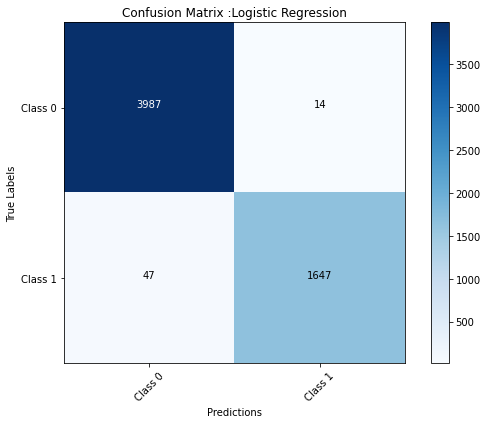

In [105]:
# Generate the confusion matrix
confusion_mat1 = confusion_matrix(test_y, y_pred1)

# Assuming you have already computed confusion_mat1

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mat1, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix :Logistic Regression')
plt.colorbar()

# Add labels for the x and y axes
classes = ["Class 0", "Class 1",]  # Replace with your class labels
plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes)

# Add the numbers inside the cells
thresh = confusion_mat1.max() / 2.0  # Threshold for text color
for i in range(confusion_mat1.shape[0]):
    for j in range(confusion_mat1.shape[1]):
        plt.text(j, i, str(confusion_mat1[i, j]), horizontalalignment="center",
                 color="white" if confusion_mat1[i, j] > thresh else "black")

plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()



MLP Classifier

In [106]:
from sklearn.neural_network import MLPClassifier

modelMLP = MLPClassifier(random_state=42)
modelMLP.fit(train_X, train_y)
y_pred2 = modelMLP.predict(test_X)
# Calculate the accuracy score
accuracy = accuracy_score(test_y, y_pred2)
print("Accuracy:", accuracy)


Accuracy: 0.9949078138718174


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [107]:

# Your previous code for model training and prediction

# Calculate the accuracy, precision, and recall scores
accuracy = accuracy_score(test_y, y_pred2)
precision = precision_score(test_y, y_pred2)
recall = recall_score(test_y, y_pred2)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Accuracy: 0.99
Precision: 1.00
Recall: 0.98


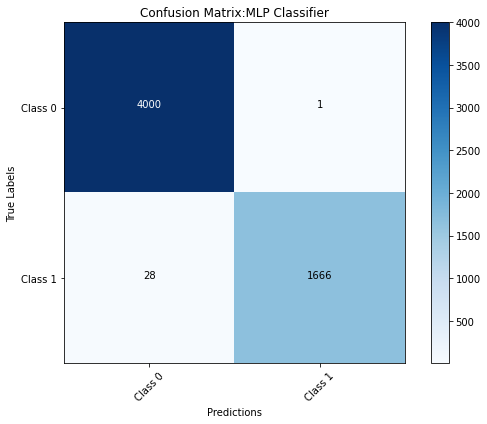

In [108]:
# Generate the confusion matrix
confusion_mat1 = confusion_matrix(test_y, y_pred2)



# Assuming you have already computed confusion_mat1

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mat1, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix:MLP Classifier')
plt.colorbar()

# Add labels for the x and y axes
classes = ["Class 0", "Class 1",]  # Replace with your class labels
plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes)

# Add the numbers inside the cells
thresh = confusion_mat1.max() / 2.0  # Threshold for text color
for i in range(confusion_mat1.shape[0]):
    for j in range(confusion_mat1.shape[1]):
        plt.text(j, i, str(confusion_mat1[i, j]), horizontalalignment="center",
                 color="white" if confusion_mat1[i, j] > thresh else "black")

plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()



Gradient Boosting Classifier

In [109]:
from sklearn.ensemble import GradientBoostingClassifier  # Import the Gradient Boosting Classifier


# Create a binary classification model with Gradient Boosting
classifier = GradientBoostingClassifier(random_state=42)

# Train the model
classifier.fit(train_X, train_y)

# Make predictions
y_pred3 = classifier.predict(test_X)




In [110]:
# Your previous code for model training and prediction

# Calculate the accuracy, precision, and recall scores
accuracy = accuracy_score(test_y, y_pred3)
precision = precision_score(test_y, y_pred3)
recall = recall_score(test_y, y_pred3)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Accuracy: 1.00
Precision: 1.00
Recall: 0.99


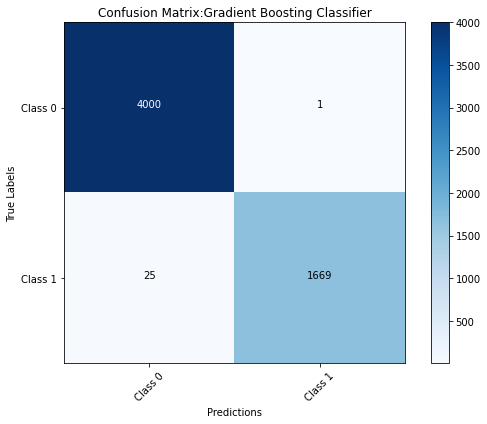

In [111]:
# Generate the confusion matrix
confusion_mat1 = confusion_matrix(test_y, y_pred3)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have already computed confusion_mat1

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mat1, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix:Gradient Boosting Classifier')
plt.colorbar()

# Add labels for the x and y axes
classes = ["Class 0", "Class 1",]  # Replace with your class labels
plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes)

# Add the numbers inside the cells
thresh = confusion_mat1.max() / 2.0  # Threshold for text color
for i in range(confusion_mat1.shape[0]):
    for j in range(confusion_mat1.shape[1]):
        plt.text(j, i, str(confusion_mat1[i, j]), horizontalalignment="center",
                 color="white" if confusion_mat1[i, j] > thresh else "black")

plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()



Saving model

In [ ]:
import joblib

# Assuming you have trained the GradientBoostingClassifier and stored it in the 'classifier' variable
# Save the model to a .pkl file
joblib.dump(classifier, 'gradient_boosting_model.pkl')

Multi Output classification : identifing fraud reason

In [126]:
data6 = data3[data3['is_fraud']==True]
data6.drop(['is_fraud'],axis=1,inplace=True)
data6['is_unhour_fraud'] = data6['is_unhour_fraud'].astype(bool)


C:\Users\admin\AppData\Local\Temp\ipykernel_17068\1144299148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data6.drop(['is_fraud'],axis=1,inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_17068\1144299148.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data6['is_unhour_fraud'] = data6['is_unhour_fraud'].astype(bool)


In [127]:
# Generate random values between 0 and 1
random_values = np.random.rand(len(data6))

# Create column1 based on conditions in column2
data6['exp_diff'] = np.where(data6['is_expDate_fraud'] == -1, -random_values, random_values)


C:\Users\admin\AppData\Local\Temp\ipykernel_17068\2694456476.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data6['exp_diff'] = np.where(data6['is_expDate_fraud'] == -1, -random_values, random_values)


In [128]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8473 entries, 20000 to 28472
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   transaction_amount              8473 non-null   float64
 1   card_number                     8473 non-null   float64
 2   transaction_status              8473 non-null   float64
 3   transaction_category            8473 non-null   float64
 4   time_between_trans              8473 non-null   float64
 5   isCashPresented                 8473 non-null   float64
 6   isCashTaken                     8473 non-null   float64
 7   isCashRetracted                 8473 non-null   float64
 8   isCashoutError                  8473 non-null   float64
 9   ExistInHost                     8473 non-null   float64
 10  n_PIN_attempts                  8473 non-null   float64
 11  cvm_methods                     8473 non-null   float64
 12  issuer_city                  

In [129]:
reasons = ['is_PIN_fraud','is_HM_fraud','is_RC_fraud','is_IF_fraud','is_CVM_fraud','is_unhour_fraud','is_expDate_fraud']

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier  # Import the Decision Tree Classifier

from sklearn.ensemble import GradientBoostingClassifier
# Assuming you have a DataFrame called 'data' with the features and target columns

# Separate features and target columns
X = data6.drop(reasons, axis=1)
y = data6[reasons]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-label classification model
base_classifier = DecisionTreeClassifier(random_state=42)
multi_output_classifier = MultiOutputClassifier(base_classifier)

# Train the model
multi_output_classifier.fit(X_train, y_train)



MultiOutputClassifier(estimator=DecisionTreeClassifier(random_state=42))

In [131]:

# Make predictions
y_pred = multi_output_classifier.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred, target_names=reasons)
print(report)

                  precision    recall  f1-score   support

    is_PIN_fraud       1.00      1.00      1.00       905
     is_HM_fraud       0.94      0.92      0.93       365
     is_RC_fraud       1.00      1.00      1.00         4
     is_IF_fraud       1.00      1.00      1.00       506
    is_CVM_fraud       1.00      1.00      1.00       275
 is_unhour_fraud       1.00      1.00      1.00      1695
is_expDate_fraud       0.95      0.95      0.95      1389

       micro avg       0.98      0.98      0.98      5139
       macro avg       0.98      0.98      0.98      5139
    weighted avg       0.98      0.98      0.98      5139
     samples avg       0.99      0.98      0.98      5139



In [135]:
test = X_test.iloc[100]
test=np.array(test).reshape(-1, 1).T
y_test.iloc[100]

is_PIN_fraud        False
is_HM_fraud         False
is_RC_fraud         False
is_IF_fraud          True
is_CVM_fraud        False
is_unhour_fraud      True
is_expDate_fraud     True
Name: 21746, dtype: bool

In [134]:
multi_output_classifier.predict(test)

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

array([[False, False, False,  True, False,  True,  True]])

In [ ]:
import joblib
joblib.dump(multi_output_classifier, 'Fraud_reason_model.pkl')